# Import libraries and Data

In [1]:
# import libraries
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns
import sklearn as sk
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [2]:
%matplotlib inline

In [3]:
# Import data frames
path = r'G:\Career Foundery\CFundry-6\2 Data set'
energy_consump = pd.read_pickle(os.path.join(path, 'Modified', 'energy_consumption.pkl'))
elect_prod = pd.read_pickle(os.path.join(path, 'Modified', 'elect_production.pkl'))
euro_gdp = pd.read_pickle(os.path.join(path, 'Modified', 'euro_gdp.pkl'))
euro_pop = pd.read_pickle(os.path.join(path, 'Modified', 'euro_population.pkl'))
euro_area = pd.read_pickle(os.path.join(path, 'Modified', 'euro_area.pkl'))

### Prepare electricity consumption table 

In [59]:
# extract the annual electricity consumption from all energy types
elect_consumption = energy_consump[energy_consump['energy-type']=='Electricity']
# remove road-transport
elect_consumption = elect_consumption.drop(elect_consumption[elect_consumption['sector']=='road-transport'].index)
# add all consumption sectors to obtain total electricity consumption
elect_consumption_total = elect_consumption.groupby(['country', 'time-period'], as_index=False)['value(KTOE)'].sum()
#rename the columns
elect_consumption_total.rename(columns={'time-period':'year', 'value(KTOE)':'elect-consump(KTOE)'}, inplace=True)
elect_consumption_total

,country,year,elect-consump(KTOE)
0,Albania,2009,389.080
1,Albania,2010,414.789
2,Albania,2011,435.254
3,Albania,2012,478.333
4,Albania,2013,578.418
...,...,...,...
464,United Kingdom,2015,25749.701
465,United Kingdom,2016,25780.799
466,United Kingdom,2017,25394.088
467,United Kingdom,2018,25472.353


### Prepare GDP table

In [60]:
# GDP dataframe
# split the time period in year and quarter
euro_gdp['year'] = np.array(euro_gdp['time-period'].str.split('-').tolist())[:,0].tolist()
euro_gdp['quarter'] = np.array(euro_gdp['time-period'].str.split('-').tolist())[:,1].tolist()
# add quarter gdp to get the annual values
euro_gdp_annual = euro_gdp.groupby(['country', 'year'], as_index=False)['GDP(mm-euro)'].sum()
# change the data type for year
euro_gdp_annual['year'] = euro_gdp_annual['year'].astype('int64')
euro_gdp_annual

,country,year,GDP(mm-euro)
0,Austria,1995,241446.2
1,Austria,1996,246899.1
2,Austria,1997,252331.0
3,Austria,1998,261172.9
4,Austria,1999,270025.3
...,...,...,...
1003,United Kingdom,2016,2690268.6
1004,United Kingdom,2017,2737087.7
1005,United Kingdom,2018,2771372.3
1006,United Kingdom,2019,2811121.0


### Prepare population table

In [61]:
euro_pop.rename(columns={'time-period':'year'}, inplace=True)
euro_pop

,country,year,population
0,Andorra,1986,44593.0
1,Andorra,1987,46976.0
2,Andorra,1988,48451.0
3,Andorra,1989,50528.0
4,Andorra,1990,50887.0
...,...,...,...
2407,Kosovo,2016,1771604.0
2408,Kosovo,2017,1783531.0
2409,Kosovo,2018,1798506.0
2410,Kosovo,2019,1795666.0


### Join all tables 

In [62]:
df1 = elect_consumption_total.merge(euro_pop, on=['country', 'year'], how='inner')
df2 = df1.merge(euro_area, on='country', how='inner' )
df3 = df2.merge(euro_gdp_annual, on=['country', 'year'], how='inner')
df3

,country,year,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro)
0,Austria,2009,4820.367,8335003.0,83871.0,320314.1
1,Austria,2010,5053.526,8351643.0,83871.0,325845.0
2,Austria,2011,5052.237,8375164.0,83871.0,335807.9
3,Austria,2012,5130.678,8408121.0,83871.0,338350.2
4,Austria,2013,5157.872,8451860.0,83871.0,338257.8
...,...,...,...,...,...,...
354,United Kingdom,2015,25749.701,64853393.0,243610.0,2644716.5
355,United Kingdom,2016,25780.799,65379044.0,243610.0,2690268.6
356,United Kingdom,2017,25394.088,65844142.0,243610.0,2737087.7
357,United Kingdom,2018,25472.353,66273576.0,243610.0,2771372.3


In [63]:
# missing value
df3.isnull().sum()

country                0
year                   0
elect-consump(KTOE)    0
population             0
area(Km^2)             0
GDP(mm-euro)           0
dtype: int64

In [64]:
df3[df3.duplicated()]

,country,year,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro)


<AxesSubplot:xlabel='elect-consump(KTOE)', ylabel='Count'>

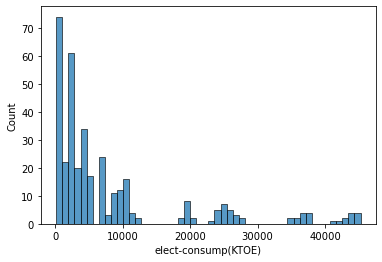

In [65]:
sns.histplot(df3['elect-consump(KTOE)'], bins=50)

In [66]:
df3.describe()

,year,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro)
count,359.000000,359.000000,3.590000e+02,359.000000,3.590000e+02
mean,2014.484680,8126.387493,1.723991e+07,163032.807799,5.001184e+05
std,3.449421,10829.658090,2.232005e+07,165450.123119,7.793686e+05
min,2009.000000,146.689000,4.109260e+05,316.000000,7.276200e+03
25%,2011.500000,1314.357500,4.236062e+06,45228.000000,4.423960e+04
50%,2014.000000,3814.962000,7.467119e+06,78867.000000,1.842692e+05
75%,2017.000000,9372.957500,1.680443e+07,301340.000000,4.210441e+05
max,2020.000000,45240.498000,8.316671e+07,643801.000000,3.247318e+06


### We have to do some modification to dataframe to prepare it for clustering. First we have to remove column 'country' as it is categorical variable and not suited for clustering. Moreover, year is not a variable to be included in our analysis and must be removed. Second the scale of main variables (elect-consump, population, area and GDP) are different and they should be standardized. 

### Data preparation for regression

In [67]:
# remove column year
df_cluster = df3.drop(columns=['year', 'country'])
df_cluster

,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro)
0,4820.367,8335003.0,83871.0,320314.1
1,5053.526,8351643.0,83871.0,325845.0
2,5052.237,8375164.0,83871.0,335807.9
3,5130.678,8408121.0,83871.0,338350.2
4,5157.872,8451860.0,83871.0,338257.8
...,...,...,...,...
354,25749.701,64853393.0,243610.0,2644716.5
355,25780.799,65379044.0,243610.0,2690268.6
356,25394.088,65844142.0,243610.0,2737087.7
357,25472.353,66273576.0,243610.0,2771372.3


In [68]:
# standardize dataframe using standard scaler
scaler = StandardScaler()
df_standard = []
df_standard = pd.DataFrame(scaler.fit_transform(df_cluster), columns = df_cluster.columns)
df_standard

,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro)
0,-0.305701,-0.399521,-0.479131,-0.231027
1,-0.284141,-0.398775,-0.479131,-0.223921
2,-0.284260,-0.397720,-0.479131,-0.211119
3,-0.277007,-0.396241,-0.479131,-0.207853
4,-0.274492,-0.394279,-0.479131,-0.207972
...,...,...,...,...
354,1.629591,2.136193,0.487698,2.755553
355,1.632466,2.159777,0.487698,2.814082
356,1.596708,2.180644,0.487698,2.874239
357,1.603945,2.199910,0.487698,2.918290


In [69]:
df_standard.describe()

,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro)
count,3.590000e+02,3.590000e+02,3.590000e+02,3.590000e+02
mean,-7.793209e-17,-8.164314e-17,1.258665e-16,-1.360719e-17
std,1.001396e+00,1.001396e+00,1.001396e+00,1.001396e+00
min,-7.378659e-01,-7.550375e-01,-9.848521e-01,-6.332434e-01
25%,-6.298941e-01,-5.834216e-01,-7.130199e-01,-5.857499e-01
50%,-3.986684e-01,-4.384593e-01,-5.094180e-01,-4.058285e-01
75%,1.152677e-01,-1.953789e-02,8.371116e-01,-1.016010e-01
max,3.431864e+00,2.957826e+00,2.909875e+00,3.529824e+00


### In the new standardized datafram all variables have a mean around 0 and std of 1. Aslo theie range is between -1 to 4.

### The elbow technique

In [70]:
kmeans = [KMeans(n_clusters=i) for i in range(1,10)]
scores = [kmeans[i].fit(df_standard).score(df_standard) for i in range(len(kmeans))]
scores

C:\Users\98912\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[-1436.0,
 -375.9887608399865,
 -218.30434460965722,
 -150.66626599203374,
 -115.20118907337583,
 -85.43171813087139,
 -65.45954376467186,
 -46.4667005956979,
 -37.12192912308143]

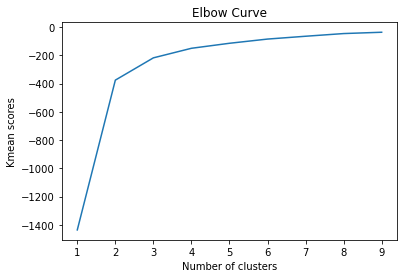

In [71]:
# Plot the scors
pl.plot(range(1,10), scores)
pl.xlabel('Number of clusters')
pl.ylabel('Kmean scores')
pl.title('Elbow Curve')
pl.show()

### It seems that 3 clusters can be selected as optimum cluster numbers. In continue we can do the clustering analysis with 3 clusters.

### Clustering Analysis with 3 cluster

In [72]:
# Create the k-means object.
kmeans = KMeans(n_clusters=3)

In [73]:
# Fit the k-means object to the data
kmeans.fit(df_standard)

KMeans(n_clusters=3)

In [74]:
df_standard['clusters'] = kmeans.fit_predict(df_standard)
df_standard

,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro),clusters
0,-0.305701,-0.399521,-0.479131,-0.231027,2
1,-0.284141,-0.398775,-0.479131,-0.223921,2
2,-0.284260,-0.397720,-0.479131,-0.211119,2
3,-0.277007,-0.396241,-0.479131,-0.207853,2
4,-0.274492,-0.394279,-0.479131,-0.207972,2
...,...,...,...,...,...
354,1.629591,2.136193,0.487698,2.755553,1
355,1.632466,2.159777,0.487698,2.814082,1
356,1.596708,2.180644,0.487698,2.874239,1
357,1.603945,2.199910,0.487698,2.918290,1


In [75]:
df_standard['clusters'].value_counts()

2    240
0     60
1     59
Name: clusters, dtype: int64

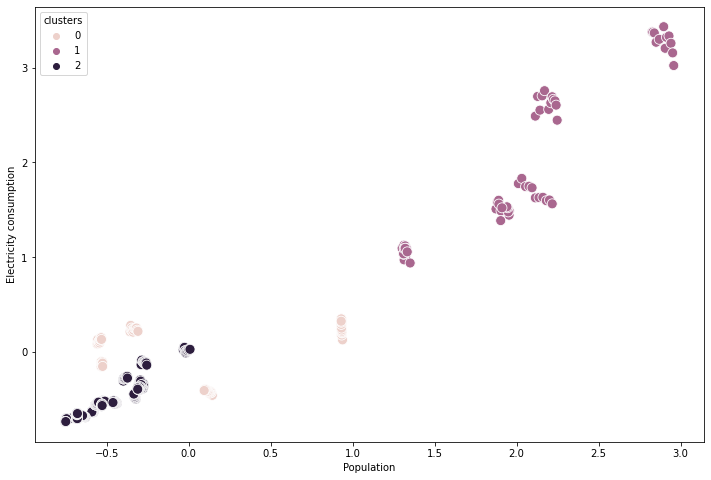

In [76]:
# Plot the clusters for the "electricity" and "population" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_standard['population'], y=df_standard['elect-consump(KTOE)'], hue=df_standard['clusters'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Population') # Label x-axis.
plt.ylabel('Electricity consumption') # Label y-axis.
plt.show()

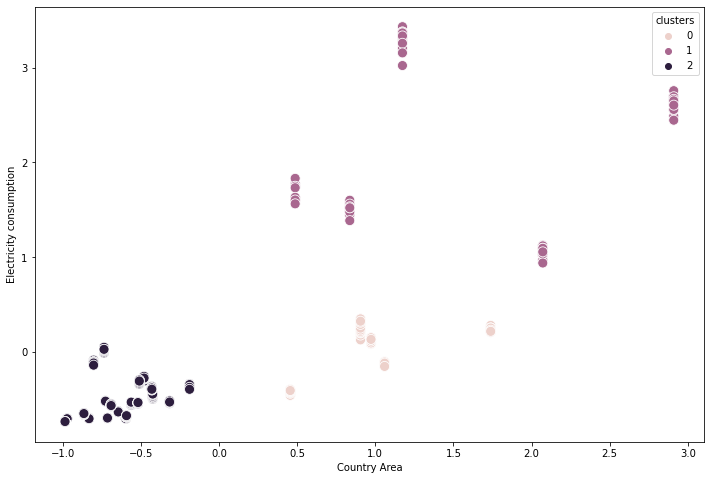

In [77]:
# Plot the clusters for the "electricity" and "area" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_standard['area(Km^2)'], y=df_standard['elect-consump(KTOE)'], hue=df_standard['clusters'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Country Area') # Label x-axis.
plt.ylabel('Electricity consumption') # Label y-axis.
plt.show()

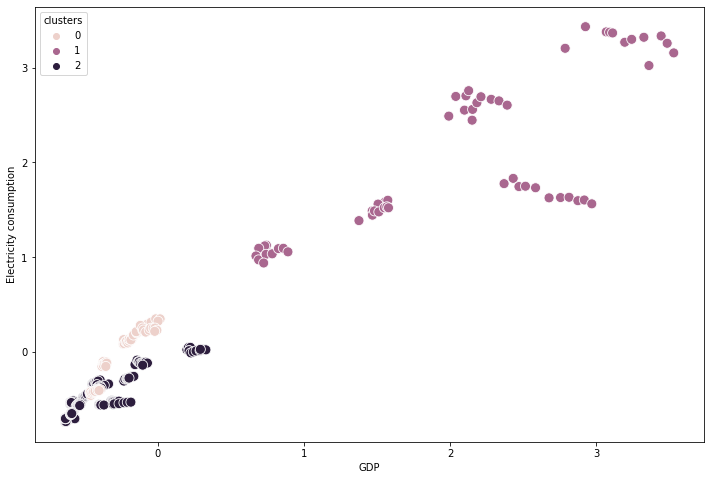

In [78]:
# Plot the clusters for the "electricity" and "GDP" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_standard['GDP(mm-euro)'], y=df_standard['elect-consump(KTOE)'], hue=df_standard['clusters'], s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('GDP') # Label x-axis.
plt.ylabel('Electricity consumption') # Label y-axis.
plt.show()

In [79]:
df_standard.loc[df_standard['clusters'] == 2, 'clusters'] = 'Low-Consumption'
df_standard.loc[df_standard['clusters'] == 1, 'clusters'] = 'High-Consumption'
df_standard.loc[df_standard['clusters'] == 0, 'clusters'] = 'Medium-Consumption'

In [80]:
# compute descriptive statistics for clusters in the original dataframe
df3['clusters'] = df_standard['clusters']
df3.groupby('clusters').agg({'elect-consump(KTOE)':['mean', 'median'], 
                         'population':['mean', 'median'], 
                         'area(Km^2)':['mean', 'median'],
                          'GDP(mm-euro)':['mean', 'median']})

elect-consump(KTOE)                population              \
                                  mean      median          mean      median   
clusters                                                                       
High-Consumption          30146.404475  25780.7990  6.373749e+07  64350226.0   
Low-Consumption            2675.213087   2294.4545  6.209080e+06   5484662.0   
Medium-Consumption         8278.068417   9448.4085  1.564062e+07   9696109.5   

                       area(Km^2)            GDP(mm-euro)              
                             mean    median          mean      median  
clusters                                                               
High-Consumption    413052.644068  357022.0  2.100023e+06  2174176.70  
Low-Consumption      59161.900000   60591.5  1.518450e+05    63537.65  
Medium-Consumption  332663.600000  323802.0  3.199720e+05   344740.05

In [81]:
dark_purple_countries = set(df3[df3['clusters'] == 'dark purple']['country'])
purple_countries = set(df3[df3['clusters'] == 'purple']['country'])
pink_countries = set(df3[df3['clusters'] == 'pink']['country'])

print('dark purple countries are: ', dark_purple_countries)
print('purple countries are: ', purple_countries)
print('pink countries are: ', pink_countries)

dark purple countries are:  set()
purple countries are:  set()
pink countries are:  set()


In [82]:
df3

,country,year,elect-consump(KTOE),population,area(Km^2),GDP(mm-euro),clusters
0,Austria,2009,4820.367,8335003.0,83871.0,320314.1,Low-Consumption
1,Austria,2010,5053.526,8351643.0,83871.0,325845.0,Low-Consumption
2,Austria,2011,5052.237,8375164.0,83871.0,335807.9,Low-Consumption
3,Austria,2012,5130.678,8408121.0,83871.0,338350.2,Low-Consumption
4,Austria,2013,5157.872,8451860.0,83871.0,338257.8,Low-Consumption
...,...,...,...,...,...,...,...
354,United Kingdom,2015,25749.701,64853393.0,243610.0,2644716.5,High-Consumption
355,United Kingdom,2016,25780.799,65379044.0,243610.0,2690268.6,High-Consumption
356,United Kingdom,2017,25394.088,65844142.0,243610.0,2737087.7,High-Consumption
357,United Kingdom,2018,25472.353,66273576.0,243610.0,2771372.3,High-Consumption


### Based on this clustering analysis we can  categorize european countries in 3 distinct groups. The Pink countries which are normally countries with lowest area (mean:59162), lowest population (mean:6.2 e+6), lowest GDP (mean:1.52e+5) and also the lowest electricity consumption (mean:2678). These are 20 small low consumer countries of Europe like North Macedonia, Estonia, Latvia, Slovakia, .... On the purple cluster there are 4 countries including: France, Germany, United Kingdom & Italy which have the highest population (mean:6.8e+07), the largest area (mean: 389482), significantly highest GDP (mean:2.36e+06) and as a result the highest level of electricity consumption (mean:32862). In the middle there is dark purple cluster having 6 countries:  Norway , Romania ,  Poland ,  Sweden ,  Finland & Spain. These are countries with medium population (mean:2.1e+07), relatively smaller area compare to purple cluster (mean:361448) and medium GDP (mean:4.5e+05) and in electricity consumption also they place in the middle rank (mean:10163). This clustering can help us consider 3 groups among European countries with different demographic, economic and electricity consumption situations and we can more investigate and compare them within and among the groups to extract additional insights and recommendations.

In [83]:
# save cluster data frame
df3.to_pickle(os.path.join(path, 'Modified', 'clustered.pkl'))
df3.to_csv(os.path.join(path, 'Modified', 'clustered.csv'))